In [1]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

from tensorflow.python.compiler.mlcompute import mlcompute
mlcompute.set_mlc_device(device_name='gpu')

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
print(tf.__version__)

2.4.0-rc0


In [3]:
def show_history_plot(dict_history, epochs) :
    plt.figure(figsize = (10,5), facecolor = 'white')
    x_range = range(1, epochs+1)

    ax = plt.subplot(1,2,1)
    
    ax = plt.plot(x_range,dict_history['acc'])
    ax = plt.plot(x_range,dict_history['val_acc'])
    ax = plt.ylim([0,1])
    ax = plt.legend(['Acc','Val Acc'])


    ax = plt.subplot(1,2,2)
    ax = plt.ylim([0,5])
    ax = plt.plot(x_range,dict_history['loss'])
    ax = plt.plot(x_range,dict_history['val_loss'])
    ax = plt.legend(['loss','Val loss'])

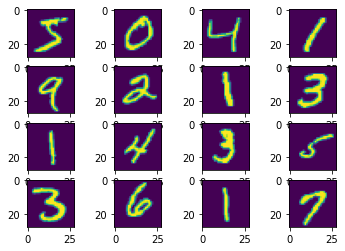

In [4]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

import matplotlib.pyplot as plt
for col1 in range(16):
    plt.subplot(4,4,col1+1)
    plt.imshow(train_x[col1])
plt.show()

In [5]:
train_x, test_x = train_x / 255.0, test_x / 255.0

In [6]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation = ReLU(), input_shape=(28,28,1), kernel_initializer='he_normal'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = ReLU(), kernel_initializer='he_normal'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation = ReLU(), kernel_initializer='he_normal'))
model.add(Dense(10, activation = Softmax()))
model.summary()
model.compile(optimizer = Adam(0.001), loss = SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,625,866
Trainable params: 1,625,866
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(train_x, train_y,  epochs = 12, batch_size = 512, validation_data = (test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
59904/60000 [============================>.] - ETA: 0s - loss: nan - acc: 0.0985